# **Tareas "introducción a machine learning"**

##Simulación de XOR

In [8]:
def OR(p,q):
  if p+q>0:
    return 1
  else:
    return 0
def AND(p,q):
  if p+q>=2:
    return 1 
  else:
    return 0
def NOT(p):
  if p==1:
    return 0
  else:
    return 1
def XOR(p,q):
  if OR(p,q)+NOT(AND(p,q))==2:
    return 1
  else:
    return 0

for i  in [0,1]:
  for j in [0,1]:
    print(i," XOR ", j, " = " ,XOR(i,j))


0  XOR  0  =  0
0  XOR  1  =  1
1  XOR  0  =  1
1  XOR  1  =  0


##Punto  1.2, 1.3

# 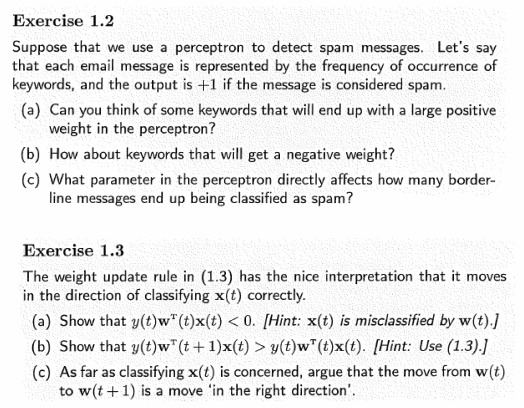

Punto 1.2

Punto 1.3

a.
Como $y(t)$ esta mal clasificado se tiene que:

$$y(t)\neq sign(w^T(t)x(t))$$

Así entonces:

$$-y(t)=sign(w^T(t)x(t))$$

por lo tanto $sign(y(t))\neq sign(w^T(t)x(t))$ y así se concluye que 
$y(t)(w^T(t)x(t)<0$

b. Se tiene que:

$$y(t)w^T(t+1)x(t)=y(t)w^t(t)x(t)+y^2(t)||x(t)||^2$$
$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~=y(t)w^t(t)x(t)+y^2(t)||x(t)||^2$$
$$~~~~>y(t)w^t(t)x(t)$$

Respecto al ítem c), a pesar de que el paso de la iteración para clasificar bien el punto no sea inmediata, se debe tener en cuenta que es una suseción creciente y en algún momento clasificará bien el punto, es decir el signo de ese $w$ será positivo al aplicar el clasificador.

## Significado de los parámetros $\left(\dfrac{||\theta||}{\gamma}\right)^{2}$


Este parámetro nos permite relacionar la cantidad de pasos que se requieren para llegar, en la demostración de convergencia del perceptrón se llegó a la siguiente desigualdad:
$$\cos(\theta , \theta^*)\geq \dfrac{\sqrt{k} \cdot \gamma}{R\cdot ||\theta^*||}$$

Así que si se toma $k=\dfrac{||\theta^*||^2}{\gamma^2}$ y suponiendo que se puede dividir a todos los puntos por la norma del vector más alejado $R$, entonces ese valor estaría definiendo aproximadamente cuantos pasos requeriría el algortimo para poder llegar a una posible solución que sería estar muy cerca del vector "ideal" dado que $\dfrac{\sqrt{k} \cdot \gamma}{||\theta^*||}=1$ para lo cual el ángulo entre el vector óptimo $ \theta^*$ y $\theta^k$ sería muy cercano a $0$.

##Punto 1.10 Lanzamiento de monedas y desigualdad de Hoeffding

In [9]:
import numpy as np
def Muestra():
  Coin=[0,1]
  Muestra=np.matrix(np.empty((0,10)))
  cont=np.array([])
  for i  in range(1000):
    Muestra=np.insert(Muestra, i , np.random.choice(Coin,10),axis=0)
    cont=np.append(cont,np.sum(Muestra[i,:]))
  pos=np.where(cont==np.min(cont))
  c1=Muestra[0,:]
  cmin=Muestra[np.min(pos),:] 
  crand=Muestra[np.random.choice(range(0,1000)),:]
  v1=np.mean(c1)
  vrand=np.mean(crand)
  vmin=np.mean(cmin)
  return v1, vrand, vmin

n=1000
def experimento(n):
    V1=[]
    Vrand=[]
    Vmin=[]
    for i in range(n):
        v1,vrand,vmin=Muestra()
        V1.append(v1)
        Vrand.append(vrand)
        Vmin.append(vmin)
    return V1,Vrand,Vmin

V1,Vrand,Vmin=experimento(n) 


mu-eps 0.4999
mu+eps 0.5001
Prob having highly deviated mean samples  0.544
La media de V1 es 0.5077 y su varianza es 0.02525071


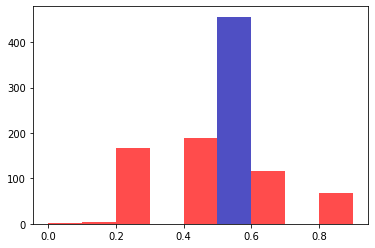

In [10]:
import matplotlib.pyplot as plt 

mu=0.5
eps=0.0001
nVal, bins, patches = plt.hist(x=V1, bins=9, color='#0504aa',alpha=0.7,density=False)

nVal = nVal/np.sum(nVal)
indexBin = bins[:-1]

# Compute the probability of observing anomalus samples, i.e., samples with
# means that deviates more than (mu+eps) or less than (mu-eps)
px_be_epsplus = np.sum(nVal[indexBin>=(mu+eps)])
px_be_epsminus = np.sum(nVal[indexBin<=(mu-eps)])

for i in range(len(indexBin)):
  if indexBin[i]>=(mu+eps):
    patches[i].set_facecolor('r')
  if indexBin[i]<=(mu-eps):
    patches[i].set_facecolor('r')


print('mu-eps',(mu-eps))
print('mu+eps',(mu+eps))
print('Prob having highly deviated mean samples ',px_be_epsminus+px_be_epsplus)
print(f"La media de V1 es { np.mean(V1)} y su varianza es {np.var(V1)}")

mu-eps 0.4999
mu+eps 0.5001
Prob having highly deviated mean samples  1.0
La media de Vran es 0.4957 y su varianza es 0.02573151


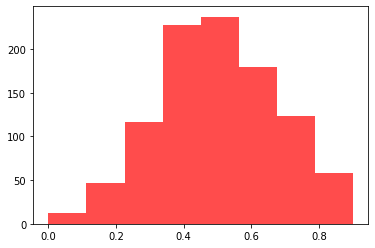

In [11]:
nVal, bins, patches = plt.hist(x=Vrand, bins=8, color='#0504aa',alpha=0.7,density=False)

nVal = nVal/np.sum(nVal)
indexBin = bins[:-1]
# Compute the probability of observing anomalus samples, i.e., samples with
# means that deviates more than (mu+eps) or less than (mu-eps)
px_be_epsplus = np.sum(nVal[indexBin>=(mu+eps)])
px_be_epsminus = np.sum(nVal[indexBin<=(mu-eps)])



for i in range(len(indexBin)):
  if indexBin[i]>=(mu+eps):
    patches[i].set_facecolor('r') 
  if indexBin[i]<=(mu-eps):
    patches[i].set_facecolor('r')


print('mu-eps',(mu-eps))
print('mu+eps',(mu+eps))
print('Prob having highly deviated mean samples ',px_be_epsminus+px_be_epsplus)
print(f"La media de Vran es { np.mean(Vrand)} y su varianza es {np.var(Vrand)}")

mu-eps 0.4999
mu+eps 0.5001
Prob having highly deviated mean samples  1.0
La media de Vmin es 0.03839999999999999 y su varianza es 0.0023654400000000003


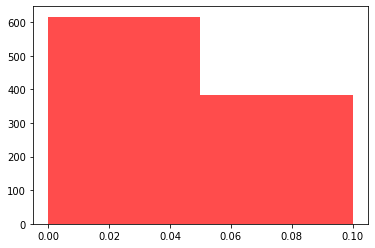

In [12]:
nVal, bins, patches = plt.hist(x=Vmin, bins=2, color='#0504aa',alpha=0.7,density=False)


nVal = nVal/np.sum(nVal)
indexBin = bins[:-1]

# Compute the probability of observing anomalus samples, i.e., samples with
# means that deviates more than (mu+eps) or less than (mu-eps)
px_be_epsplus = np.sum(nVal[indexBin>=(mu+eps)])
px_be_epsminus = np.sum(nVal[indexBin<=(mu-eps)])


for i in range(len(indexBin)):
  if indexBin[i]>=(mu+eps):
    patches[i].set_facecolor('r')
  if indexBin[i]<=(mu-eps):
    patches[i].set_facecolor('r')


print('mu-eps',(mu-eps))
print('mu+eps',(mu+eps))
print('Prob having highly deviated mean samples ',px_be_epsminus+px_be_epsplus)
print(f"La media de Vmin es { np.mean(Vmin)} y su varianza es {np.var(Vmin)}")

Item c)

In [13]:
def Grafi_cota_errores(V, name,namlabelx,namlabely):
  e=np.linspace(0,1,100)
  nVal= np.histogram(V,200)[0]
  bins= np.histogram(V,200)[1]


  nVal = nVal/np.sum(nVal)
  indexBin = bins[:-1]

  # Compute the probability of observing anomalus samples, i.e., samples with
  # means that deviates more than (mu+eps) or less than (mu-eps)
  px_be_epsplus=np.array([])
  px_be_epsminus=np.array([])

  CoefHoeff=2*np.exp(-2*(e**2)*n)

  for i in range(len(e)):
    a=np.sum(nVal[indexBin>=(mu+e[i])])
    px_be_epsplus=np.append(px_be_epsplus,a)
    b=np.sum(nVal[indexBin<=(mu-e[i])])
    px_be_epsminus=np.append(px_be_epsminus,b)

  plt.figure(figsize=(5,5))
  plt.plot(e,px_be_epsplus+px_be_epsminus,"k",label=name)
  plt.plot(e,CoefHoeff,"r", label="Hoeffding")
  plt.xlabel(namlabelx)
  plt.ylabel(namlabely)
  plt.title(f"Comparación de cotas entre  Hoeffding y {name}")
  plt.legend()
  plt.show()


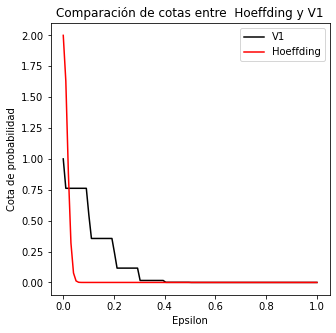

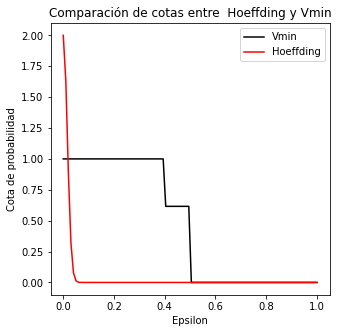

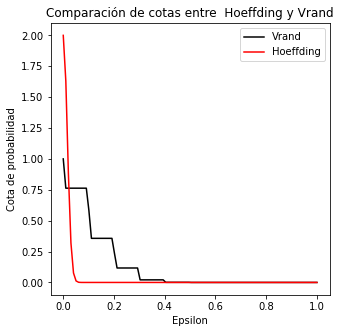

In [14]:
Grafi_cota_errores(V1, "V1","Epsilon", "Cota de probabilidad")
Grafi_cota_errores(Vmin, "Vmin","Epsilon", "Cota de probabilidad")
Grafi_cota_errores(Vrand, "Vrand","Epsilon", "Cota de probabilidad")


Se puede concluir que que para $\epsilon$ pequeños en la variable $C_1$ y la variable $C_{ran}$, la cota se ajusta a la cota de Hoeffding hasta cierta parte, después no, en cambio para $C_{min}$ en ningún lado se ajusta dado que la curva siempre está por encima de la cota de Hoeffding. 

c) Cuando se selecciona deliberadamente una muestra específica, los estimadores cambian y la cota de Hoeffding no aplica para esta situación, la relación es que en la figura las hipótesis se selccionan al azar que no es la situación de este ejercicio.

##Ejercicio 1.11

a)  No puede garantizar  porque puede haber sobre ajuste sobre los datos y esto no garantiza que clasifique bien en ua muestra fuera de D

b)  Como S se sobre ajusta a D y como todas las etiquetas asignan a $+1$, entonces eso quiere decir que S asignará siempre al $+1$, dándole más posibilidades al azar de ser una mejor hipótesis.   

c)  Se necesita ver que es $P(P(S_y = f) > P(C_y = f))$ donde $S_y$ es la hipótesis de salida de $S$, $C_y$ es la hipótesis de salida de $C$, como $y_n = +1$ entonces $S_y = +1$. Además, $P(f(x) = +1)= 0.9$ eso implica que $P(S_y = f) = 0.9$,
Tenemos que $P(C_y = +1) = 0.5$, P(C_y = -1) = 0.5$, $P(f(x) = +1) = 0.9$, $P(f(x) = -1) = 0.1$, ahora esto implica usando probabilidad total que 

$P(C_y = f) = P(C_y=h_1)\cdot P(F=+1) + P(C_y=h_2)\cdot P(f=-1)$

$P(C_y = f) = 0.5*0.9 + 0.5*0.1 = 0.5$

Como  $0.9 > 0.5$, entonces  $P(P(Sy = f) > P(Cy = f)) = 1$

d)  Si se toma  a $p < 0.5$ pues:

$$P(S_y=f)=P(S_y=1)P(S_y=h_1)+P(S_y=-1)P(S_y=h_2)$$

$$P(S_y=f)=0.5\cdot 1+0.5\cdot 0$$

y

$$P(C_y=f)=P(C_y=1)P(C_y=h_1)+P(C_y=-1)P(C_y=h_2)$$

$$P(C_y=f)=0.5\cdot 0.5+0.5\cdot 0.5=0.5$$

Con lo cual se tiene que si $p<0.5$ entonces $P(C_y=f)>P(S_y=f)$